In [1]:
# correr desde la terminal el comando <pip install geopandas>
# correr desde la terminal el comando <pip install descartes>
import os
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import numpy as np
from geopandas import GeoDataFrame as gdf

# Visualización geográfica 

## Descargando base de datos

In [2]:
ls

Bases_de_datos/     LICENSE                            ModelitoPFinal.ipynb
Descriptivos.ipynb  Mapas.ipynb                        README.md
Estimaciones.ipynb  Minimos_cuadrados_denuncias.ipynb


In [3]:
cd Bases_de_datos

/home/jovyan/midirectorio/Bases_de_datos


In [4]:
ls

'Base original'
 Bases_de_datos_modificadas_violencia.ipynb
 Denuncias_por_alcaldia.csv
 Promedio_denuncias_alcaldia.csv
 README.md
 coord.csv
 denuncias_2016_2019.csv
 denuncias_2016_2019_cada_100mil.csv
 denuncias_al_anio.csv
 denuncias_mensuales.csv
 shapes/
 shapes2/
 viol_numero_denuncias_ok.csv


In [5]:
coord = pd.read_csv('coord.csv')

In [6]:
cd shapes

/home/jovyan/midirectorio/Bases_de_datos/shapes


In [7]:
ls

coloniascdmx.dbf  coloniascdmx.prj  coloniascdmx.shp  coloniascdmx.shx


In [8]:
colonias = gpd.read_file("coloniascdmx.shp")

In [9]:
cd ..

/home/jovyan/midirectorio/Bases_de_datos


In [10]:
ls

'Base original'
 Bases_de_datos_modificadas_violencia.ipynb
 Denuncias_por_alcaldia.csv
 Promedio_denuncias_alcaldia.csv
 README.md
 coord.csv
 denuncias_2016_2019.csv
 denuncias_2016_2019_cada_100mil.csv
 denuncias_al_anio.csv
 denuncias_mensuales.csv
 shapes/
 shapes2/
 viol_numero_denuncias_ok.csv


In [11]:
cd shapes2

/home/jovyan/midirectorio/Bases_de_datos/shapes2


In [12]:
ls

alcaldias.dbf  alcaldias.prj  alcaldias.shp  alcaldias.shx


In [13]:
alcaldias = gpd.read_file("alcaldias.shp",encoding = 'utf-8')

## Creando dataframe con coordenadas

In [14]:
coord

,n,alcaldia_hechos,ao_inicio,x,y
0,1,AZCAPOTZALCO,2016,19.484049,-99.182773
1,2,MIGUEL HIDALGO,2016,19.440357,-99.173618
2,3,ALVARO OBREGON,2016,19.399237,-99.192709
3,4,BENITO JUAREZ,2016,19.366661,-99.169106
4,5,TLALPAN,2016,19.243469,-99.173013
...,...,...,...,...,...
431061,374871,IZTAPALAPA,2019,19.374620,-99.007530
431062,374872,IZTAPALAPA,2019,19.377900,-99.018790
431063,374873,CUAUHTEMOC,2019,19.437390,-99.146680
431064,374874,CUAUHTEMOC,2019,19.421210,-99.149570


In [15]:
type(coord)

pandas.core.frame.DataFrame

In [16]:
points= gdf(coord, geometry=gpd.points_from_xy(coord.y, coord.x))

In [17]:
points [:3]

,n,alcaldia_hechos,ao_inicio,x,y,geometry
0,1,AZCAPOTZALCO,2016,19.484049,-99.182773,POINT (-99.18277 19.48405)
1,2,MIGUEL HIDALGO,2016,19.440357,-99.173618,POINT (-99.17362 19.44036)
2,3,ALVARO OBREGON,2016,19.399237,-99.192709,POINT (-99.19271 19.39924)


In [18]:
colonias.head(6)

,nombre,entidad,cve_alc,alcaldia,cve_col,secc_com,secc_par,geometry
0,LOMAS DE CHAPULTEPEC,9.0,16.0,MIGUEL HIDALGO,16-042,"4924, 4931, 4932, 4935, 4936, 4940, 4987","4923, 4937, 4938, 4939, 4942","POLYGON ((-99.22017 19.42803, -99.22009 19.428..."
1,LOMAS DE REFORMA (LOMAS DE CHAPULTEPEC),9.0,16.0,MIGUEL HIDALGO,16-044,4963,4964,"POLYGON ((-99.22967 19.41406, -99.22970 19.413..."
2,DEL BOSQUE (POLANCO),9.0,16.0,MIGUEL HIDALGO,16-026,None,"4918, 4919","POLYGON ((-99.20821 19.43282, -99.20813 19.432..."
3,PEDREGAL DE SANTA URSULA I,9.0,3.0,COYOACAN,03-135,"433, 500, 431, 513, 501","424, 425, 426, 430, 499","POLYGON ((-99.14587 19.31979, -99.14579 19.319..."
4,AJUSCO I,9.0,3.0,COYOACAN,03-128,"376, 377, 378, 379, 404, 493, 498",374,"POLYGON ((-99.15854 19.33038, -99.15785 19.329..."
5,VISTAS DEL MAUREL (U HAB),9.0,3.0,COYOACAN,03-124,477,None,"POLYGON ((-99.17469 19.30575, -99.17470 19.305..."


In [19]:
alcaldias

,nomgeo,cve_mun,cve_ent,cvegeo,municipio,geometry
0,Milpa Alta,009,09,09009,9,"POLYGON ((-98.99723 19.22731, -98.99745 19.227..."
1,Benito Juárez,014,09,09014,14,"POLYGON ((-99.13679 19.40156, -99.13682 19.401..."
2,Gustavo A. Madero,005,09,09005,5,"POLYGON ((-99.11860 19.58446, -99.11691 19.581..."
3,Coyoacán,003,09,09003,3,"POLYGON ((-99.13923 19.35687, -99.13772 19.356..."
4,Miguel Hidalgo,016,09,09016,16,"POLYGON ((-99.19058 19.46794, -99.19066 19.465..."
5,La Magdalena Contreras,008,09,09008,8,"POLYGON ((-99.20859 19.33610, -99.20867 19.335..."
6,Tláhuac,011,09,09011,11,"POLYGON ((-98.97893 19.32393, -98.97856 19.323..."
7,Azcapotzalco,002,09,09002,2,"POLYGON ((-99.18231 19.50748, -99.18229 19.507..."
8,Iztacalco,006,09,09006,6,"POLYGON ((-99.05584 19.42196, -99.05589 19.421..."
9,Álvaro Obregón,010,09,09010,10,"POLYGON ((-99.18871 19.39475, -99.18868 19.394..."


## Explorando los datos

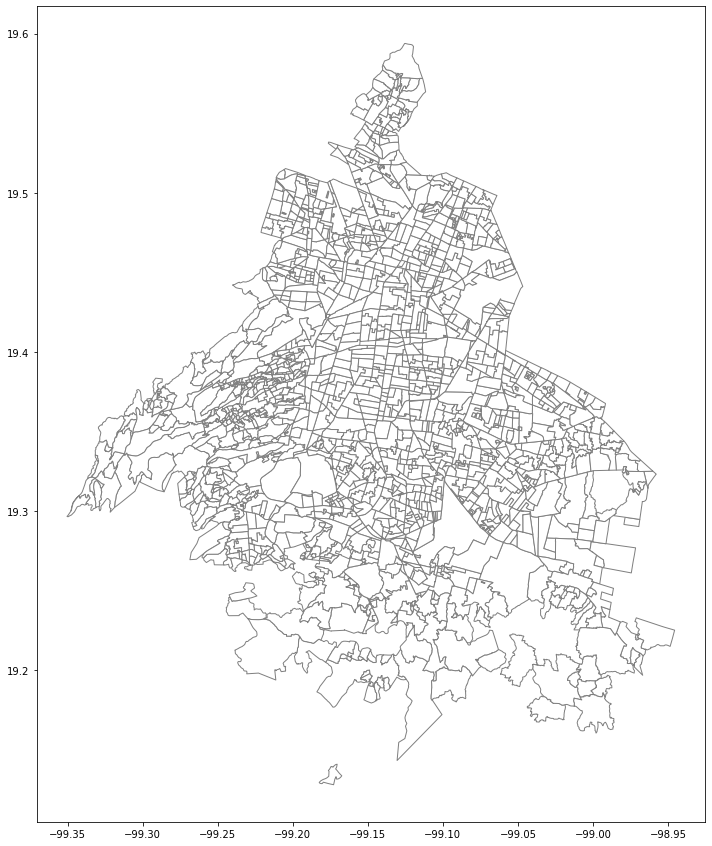

In [20]:
fig, ax = plt.subplots(figsize = (15,15))
colonias.plot(ax=ax,color='white', edgecolor='gray')

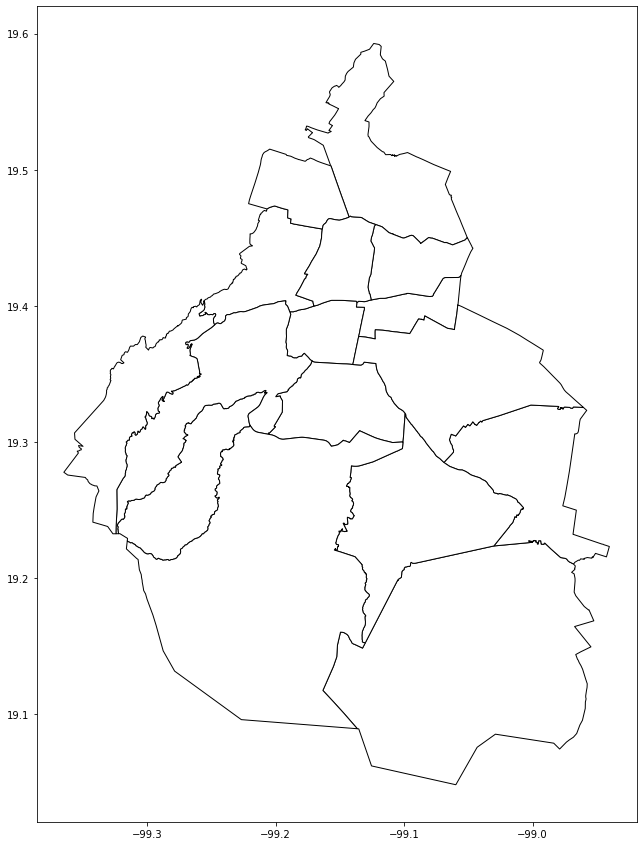

In [21]:
fig, ax = plt.subplots(figsize = (15,15))
alcaldias.plot(ax=ax,color='white', edgecolor='black')

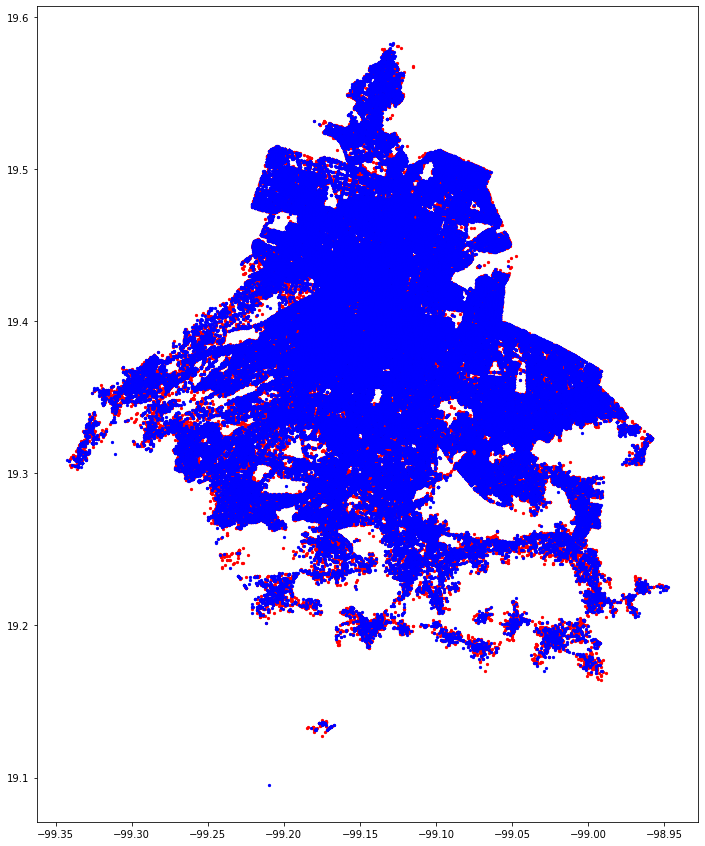

In [22]:
fig, ax = plt.subplots(figsize = (15,15))
points[points["ao_inicio"]==2019].plot(ax=ax, markersize=5, color="red", marker="o", label="2019")
points[points["ao_inicio"]==2016].plot(ax=ax, markersize=5, color="blue", marker="o", label="2016")

## Uniendo la información 

In [23]:
alcaldias['coords'] = alcaldias['geometry'].apply(lambda x: x.representative_point().coords[:])
alcaldias['coords'] = [coords[0] for coords in alcaldias['coords']]## Calcula punto dentro de los poliginos para colocar nombre de la delegacion

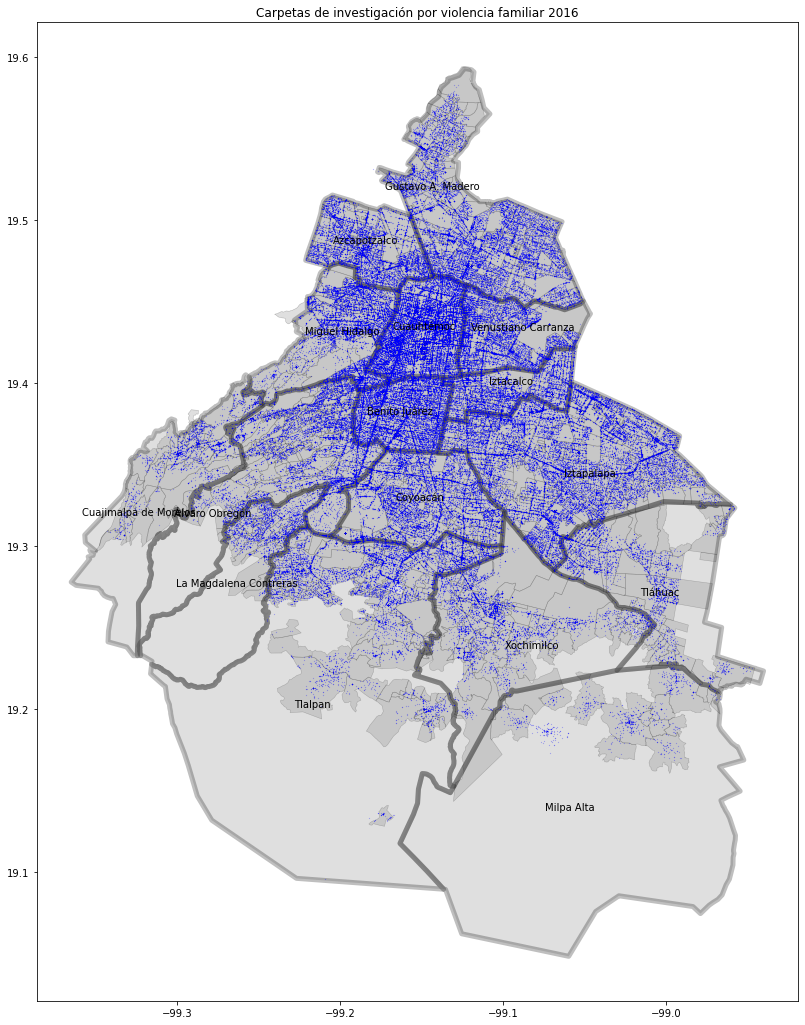

In [28]:
fig, ax = plt.subplots(figsize = (18,18))
colonias.plot(ax=ax,color='grey', edgecolor='black',linewidth=.5,alpha=0.25)
alcaldias.plot(ax=ax,color='grey', edgecolor='black', linewidth=5,alpha=0.25)
points[points["ao_inicio"]==2016].plot(ax=ax, markersize=.01, color="blue", marker="o", label="2016")
plt.title("Carpetas de investigación por violencia familiar 2016")
for idx, row in alcaldias.iterrows():
    plt.annotate(s=row['nomgeo'], xy=row['coords'],
                 horizontalalignment='center')

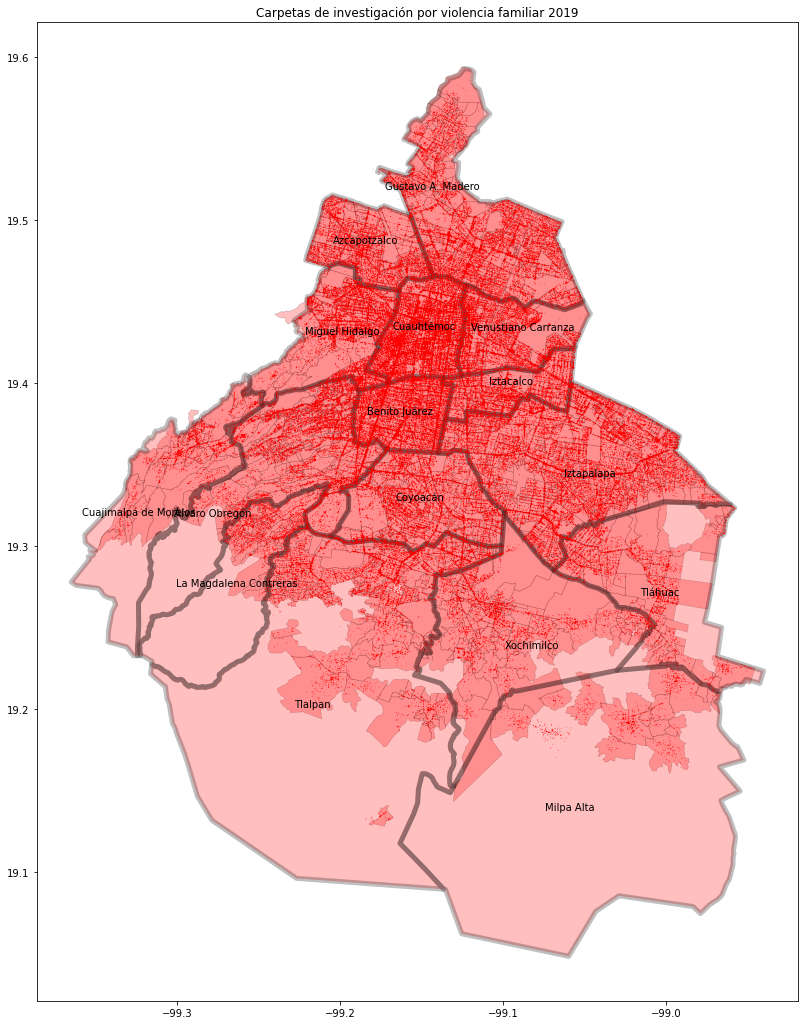

In [32]:
fig, ax = plt.subplots(figsize = (18,18))
colonias.plot(ax=ax,color='red', edgecolor='black',linewidth=.5,alpha=0.25)
alcaldias.plot(ax=ax,color='red', edgecolor='black', linewidth=5,alpha=0.25)
points[points["ao_inicio"]==2019].plot(ax=ax, markersize=.01, color="red", marker="o", label="2019")
plt.title("Carpetas de investigación por violencia familiar 2019")
for idx, row in alcaldias.iterrows():
    plt.annotate(s=row['nomgeo'], xy=row['coords'],
                 horizontalalignment='center')

Como habíamos advertido las alcaldías con mayor número de carpetas abiertas son las mismas en todos los periodos  analizados. Sin embargo, bajo la perspectiva geográfica  alcaldías como Benito Juárez  y Cuauhtémoc  parecen tener muchas más denuncias con relaciòn a su extensión territorial, que otras como Milpa Alta o Tlalpan 